# Advent of Code

Solutions for Advent of Code 2023 puzzles.

In [1]:
def check_answer(result, answer=None):
    print("Result: ", result)
    if answer:
        assert result == answer, f"Result not equal to answer {answer}."

## Day 1

In [2]:
def day1_1(answer=None):
    with open("day1.txt", "r") as f:
        calories = f.read().splitlines()
    elves_cal = []
    total_cal = 0
    for c in calories:
        if c == "":
            elves_cal.append(total_cal)
            total_cal = 0
        else:
            total_cal += int(c)
    result = max(elves_cal)
    check_answer(result, answer)

In [3]:
day1_1(70509)

Result:  70509


In [4]:
def day1_2(answer=None):
    with open("day1.txt", "r") as f:
        calories = f.read().splitlines()
    elves_cal = []
    total_cal = 0
    for c in calories:
        if c == "":
            elves_cal.append(total_cal)
            total_cal = 0
        else:
            total_cal += int(c)
    result = sum(sorted(elves_cal, reverse=True)[:3])
    check_answer(result, answer)

In [5]:
day1_2(208567)

Result:  208567


## Day 2

In [6]:
def day2_1(answer=None):
    with open("day2.txt", "r") as f:
        games = f.read().splitlines()
    games = [g.split(" ") for g in games]

    defeats = {"A": "C", "C": "B", "B": "A"}
    mapper = {"X": "A", "Y": "B", "Z": "C"}
    points = {"A": 1, "B": 2, "C": 3}

    total_score = 0
    for game in games:
        p1, p2 = game
        p2 = mapper[p2]
        if p1 == p2:
            total_score += 3 + points[p2]
        elif defeats[p2] == p1:
            total_score += 6 + points[p2]
        else:
            total_score += 0 + points[p2]
            continue

    check_answer(total_score, answer)

In [7]:
day2_1(14163)

Result:  14163


In [8]:
def day2_2(answer=None):
    with open("day2.txt", "r") as f:
        games = f.read().splitlines()
    games = [g.split(" ") for g in games]

    defeats = {"A": "C", "C": "B", "B": "A"}
    loses = {v: k for k, v in defeats.items()}
    points = {"A": 1, "B": 2, "C": 3}

    total_score = 0
    for game in games:
        p1, p2 = game
        if p2 == "Y":
            my_play = p1
            total_score += points[my_play] + 3
        elif p2 == "Z":
            my_play = loses[p1]
            total_score += points[my_play] + 6
        else:
            my_play = defeats[p1]
            total_score += points[my_play] + 0
            continue

    check_answer(total_score, answer)

In [9]:
day2_2(12091)

Result:  12091


## Day 3

In [10]:
import string


def day3_1(answer=None):
    with open("day3.txt", "r") as f:
        rucksacks = f.read().splitlines()

    string.ascii_lowercase
    priorities = string.ascii_lowercase + string.ascii_uppercase

    def get_priority(letter):
        return priorities.index(letter) + 1

    priority_sum = 0
    for rucksack in rucksacks:
        half = int(len(rucksack) / 2)
        compartment1 = set(rucksack[:half])
        compartment2 = set(rucksack[half:])

        common_items = compartment1.intersection(compartment2)
        for item in common_items:
            priority_sum += get_priority(item)

    check_answer(priority_sum, answer)

In [11]:
day3_1(answer=7967)

Result:  7967


In [12]:
from typing import Iterable, Iterator
import itertools
import string


def day3_2(answer=None):
    with open("day3.txt", "r") as f:
        rucksacks = f.read().splitlines()

    string.ascii_lowercase
    priorities = string.ascii_lowercase + string.ascii_uppercase

    def get_priority(letter):
        return priorities.index(letter) + 1

    def grouper(iterable: Iterable, n: int) -> Iterator[list]:
        iterator = iter(iterable)
        while chunk := list(itertools.islice(iterator, n)):
            yield chunk

    priority_sum = 0
    for group in grouper(rucksacks, 3):
        elves_items = []
        for elf in group:
            elves_items.append(set(elf))

        badges = set.intersection(*elves_items)
        badge = next(iter(badges))

        priority_sum += get_priority(badge)

    check_answer(priority_sum, answer)

In [13]:
%%time

day3_2(answer=2716)

Result:  2716
CPU times: user 552 µs, sys: 76 µs, total: 628 µs
Wall time: 555 µs


## Day 4

In [14]:
def day4_1(answer=None):
    with open("day4.txt", "r") as f:
        pairs = f.read().splitlines()
    cases = 0
    for pair in pairs:
        p1, p2 = pair.split(",")
        p1 = set(range(int(p1.split("-")[0]), int(p1.split("-")[1]) + 1))
        p2 = set(range(int(p2.split("-")[0]), int(p2.split("-")[1]) + 1))
        if p1.issubset(p2) or p2.issubset(p1):
            cases += 1
    check_answer(cases, answer)

In [15]:
day4_1(538)

Result:  538


In [16]:
def day4_2(answer=None):
    with open("day4.txt", "r") as f:
        pairs = f.read().splitlines()

    cases = 0
    for pair in pairs:
        p1, p2 = pair.split(",")
        p1 = list(range(int(p1.split("-")[0]), int(p1.split("-")[1]) + 1))
        p2 = list(range(int(p2.split("-")[0]), int(p2.split("-")[1]) + 1))
        if (p1[-1] >= p2[0] and p1[-1] <= p2[-1]) or (
            p2[-1] >= p1[0] and p2[-1] <= p1[-1]
        ):
            cases += 1
    check_answer(cases, answer)

In [17]:
day4_2(792)

Result:  792


## Day 5

In [18]:
import queue
from pprint import pprint
import re


def parse_things(input_path="day5.txt"):
    with open(input_path, "r") as f:
        input_data = f.read().splitlines()

    for i, line in enumerate(input_data):
        if line == "":
            sep = i
    stacks = input_data[: sep - 1]
    operations = input_data[sep + 1 :]
    n_stacks = int(input_data[sep - 1].strip()[-1])
    stacks2 = {i: [] for i in range(1, n_stacks + 1)}
    for line in stacks:
        for n_stack in range(1, n_stacks + 1):
            idx = 1 + 4 * (n_stack - 1)
            crate = line[idx]
            if crate != " ":
                if not stacks2[n_stack]:
                    stacks2[n_stack] = [crate]
                else:
                    stacks2[n_stack] = [crate] + stacks2[n_stack]

    stacks3 = {i: queue.LifoQueue() for i in range(1, n_stacks + 1)}

    for i, stack in stacks2.items():
        for crate in stack:
            stacks3[i].put(crate)

    operations2 = [re.findall(r"[0-9]+", op) for op in operations]
    operations2 = [[int(l) for l in v] for v in operations2]

    return stacks3, operations2


def day5_1(answer=None):
    stacks, operations = parse_things()

    # Move Crates!
    for i, op in enumerate(operations):
        n_crates, stack_i, stack_j = op
        for i in range(n_crates):
            if not stacks[stack_i].empty():
                crate = stacks[stack_i].get()
                stacks[stack_j].put(crate)
            else:
                print("Empty Queue! There was more crates required than stack's size.")
                return

    result = "".join(q.get() for q in stacks.values() if not q.empty())
    check_answer(result, answer)

In [19]:
day5_1("FJSRQCFTN")

Result:  FJSRQCFTN


In [20]:
def day5_2(answer=None):
    stacks, operations = parse_things("day5.txt")

    # Move Crates!
    for i, op in enumerate(operations):
        n_crates, stack_i, stack_j = op
        crates = []
        for i in range(n_crates):
            if not stacks[stack_i].empty():
                crates.append(stacks[stack_i].get())
            else:
                print("Empty Queue! There was more crates required than stack's size.")
                return
        for crate in crates[::-1]:
            stacks[stack_j].put(crate)

    result = "".join(q.get() for q in stacks.values() if not q.empty())
    check_answer(result, answer)

In [21]:
day5_2("CJVLJQPHS")

Result:  CJVLJQPHS


## Day 6

We can use a unique function for both parts.

In [24]:
import queue
import collections


def day_6_1(n=4, answer=None):
    with open("day6.txt", "r") as f:
        input_data = f.read().splitlines()[0]

    marker = []
    for i in range(n - 1, len(input_data)):
        last4 = list(input_data[i - (n - 1) : i + 1])
        last4uniques = [
            item for item, count in collections.Counter(last4).items() if count == 1
        ]
        if last4 == last4uniques:
            return i + 1
    check_answer(result, answer)

In [25]:
day_6_1(n=4, answer=1723)

1723

In [26]:
day_6_1(n=14, answer=3708)

3708


## Day 7

In [27]:
from __future__ import annotations
from typing import Union, Tuple, List
import re

Commands: list[str]
File: dict
Dir: dict[Union[Dir, File], Dir]


def mount_tree() -> Tuple[Dir, List[Dir]]:
    with open("day7.txt", "r") as f:
        commands: Commands = f.read().splitlines()

    # checks cmd 'ls'
    ls_regex = re.compile(r"^\$\sls")
    # checks cmd 'cd some_dir'
    cd_regex = re.compile(r"\$\scd\s(.+)")
    # checks terminal output of some file with its size like '123 some_file.extension'
    file_regex = re.compile(r"^([0-9]+)\s+(.+)")
    # checks terminal output for a name of folder
    dir_regex = re.compile(r"dir(.+)")

    # terminal starts with '~'
    current_dir: Dir = {}
    current_dir["."] = current_dir
    current_dir[".."] = None
    current_dir["name"] = "~"
    tree: Dir = current_dir
    all_dirs = [current_dir]

    def add_child_dir(current_dir: Dir, next_dir_name: str, all_dirs) -> None:
        next_dir: Dir = {".": None, "..": current_dir, "name": next_dir_name}
        next_dir["."] = next_dir
        current_dir.update({next_dir_name: next_dir})
        all_dirs.append(next_dir)
        return next_dir

    for cmd in commands:
        if ls_regex.search(cmd):
            continue
        elif cd_regex.search(cmd):
            next_dir_name = cd_regex.search(cmd).groups()[0]
            if next_dir_name not in current_dir:
                next_dir = add_child_dir(current_dir, next_dir_name, all_dirs)
            else:
                next_dir: Dir = current_dir[next_dir_name]
            current_dir: Dir = next_dir
        elif file_regex.search(cmd):
            size, file_name = file_regex.search(cmd).groups()
            if file_name not in current_dir:
                file: File = {file_name: size}
                current_dir.update(file)
        elif dir_regex.search(cmd):
            next_dir_name = dir_regex.search(cmd).groups()[0]
            if next_dir_name not in current_dir:
                next_dir = add_child_dir(current_dir, next_dir_name, all_dirs)
        else:
            raise ValueError(f"Invalid command '{cmd}'.")

    return tree, all_dirs


def calc_child_size(obj: Union[Dir, int]) -> int:
    size = 0
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k not in (".", "..", "name"):
                if isinstance(v, int):
                    size += v
                else:
                    size += calc_child_size(v)
    else:
        size = int(obj)
    return size


def day7_1(answer=None):
    tree: Dir
    all_dirs: List[Dir]
    tree, all_dirs = mount_tree()

    result = 0
    _all_dirs = [v for v in all_dirs if v["name"] != "~"]
    for directory in _all_dirs:
        size = calc_child_size(directory)
        if size <= 100000:
            result += size
    result

    check_answer(result, answer)

In [28]:
day7_1(1783610)

Result:  1783610


In [29]:
def day7_2(answer=None, total_disk=70000000, min_memory_needed=30000000):
    tree: Dir
    all_dirs: List[Dir]
    tree, all_dirs = mount_tree()

    _all_dirs = [v for v in all_dirs if v["name"] != "~"]
    free = total_disk - calc_child_size(all_dirs[0])  # the '/' folder
    to_free_up = min_memory_needed - free

    result = None
    for d in _all_dirs:
        size = calc_child_size(d)
        if not result:
            result = size
        if size >= to_free_up and size < result:
            result = size

    check_answer(result, answer)

In [30]:
%time
day7_2(4370655)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Result:  4370655


## Day 8

In [31]:
import numpy as np


def day8_1(answer=None):
    with open("day8.txt", "r") as f:
        X = f.read().splitlines()
        X = [list(row) for row in X]
        X = np.array(X)

    m, n = X.shape

    visibles = 0
    edges = 2 * X.shape[0] + 2 * (X.shape[1] - 2)
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            if (
                X[i, j] > max(X[:i, j])
                or X[i, j] > max(X[i + 1 :, j])
                or X[i, j] > max(X[i, :j])
                or X[i, j] > max(X[i, j + 1 :])
            ):
                visibles += 1

    result = visibles + edges

    check_answer(result, answer)

In [32]:
%time
day8_1(1560)

CPU times: user 17 µs, sys: 7 µs, total: 24 µs
Wall time: 4.53 µs
Result:  1560


In [33]:
import numpy as np


def day8_2(answer=None):
    with open("day8.txt", "r") as f:
        X = f.read().splitlines()
        X = [list(row) for row in X]
        X = np.array(X)

    m, n = X.shape

    def find_visibles(arr, value, ascending=True):
        visibles = 0
        arr = arr if ascending else arr[::-1]
        for a in arr:
            if a < value:
                visibles += 1
            else:
                visibles += 1
                break
        return visibles

    scores = np.zeros((m, n))
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            score = 0
            left = find_visibles(X[:i, j], X[i, j], ascending=False)  # left
            right = find_visibles(X[i + 1 :, j], X[i, j], ascending=True)  # right
            up = find_visibles(X[i, :j], X[i, j], ascending=False)  # up
            down = find_visibles(X[i, j + 1 :], X[i, j], ascending=True)  # down

            score = left * right * up * down
            scores[i, j] = score

    result = int(scores.max())
    check_answer(result, answer)

In [34]:
%time

day8_2(252000)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Result:  252000


## Day 9

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")


def get_signed_vectors(direction, steps):
    mapper = {
        "L": np.array([-1, 0]),
        "R": np.array([1, 0]),
        "U": np.array([0, 1]),
        "D": np.array([0, -1]),
    }
    return np.array([mapper[direction] for _ in range(int(steps))])


def vector_to_move(arr):
    v = np.copy(arr)
    v[np.abs(v) > 1] = np.sign(v[np.abs(v) > 1]) * (np.abs(v[np.abs(v) > 1]) - 1)
    return v


def plot_knots_and_visits(knots, visits):
    H, T = knots[0], knots[-1]
    plt.scatter(H[0], H[1], label=f"$H = ({H[0]}, {H[1]})$", c="green")
    plt.scatter(T[0], T[1], label=f"$T = ({T[0]}, {T[1]})$", c="red")
    x_other_knots, y_other_knots = [v[0] for v in knots[1:-1]], [
        v[1] for v in knots[1:-1]
    ]
    plt.scatter(x_other_knots, y_other_knots, label="other knots", alpha=0.4, c="gray")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Rope State")

    x, y = [v[0] for v in visits], [v[1] for v in visits]
    plt.plot(x, y, label="Tail visits", lw=1)

    plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))


def day9(n_knots, answer=None, plot=True):
    # Get input data and mount vectors of motions
    with open("day9.txt", "r") as f:
        motions = f.read().splitlines()
        motions = [el.split(" ") for el in motions]
    motion_vectors = []
    for direction, steps in motions:
        vectors = get_signed_vectors(direction, steps)
    motion_vectors = [
        get_signed_vectors(direction, steps) for direction, steps in motions
    ]

    # H is the first knot, T is the last knot
    knots = [np.array([0, 0]) for _ in range(n_knots)]
    tail_visited = [list(knots[-1])]

    for head_motions in motion_vectors:
        for head_motion in head_motions:
            for i, knot in enumerate(knots):
                if i == 0:
                    # make H to move
                    knots[i] = knots[i] + head_motion
                    knot_ahead = knots[i]
                else:
                    # find difference vector
                    diff = knot_ahead - knot
                    # make knot to move if difference is higher than sqrt(2)
                    if np.linalg.norm(diff) > np.sqrt(2):
                        knot = knot + vector_to_move(diff)
                        if (i == n_knots - 1) and (list(knot) not in tail_visited):
                            tail_visited.append(list(knot))
                    knots[i] = knot  # update knot
                    knot_ahead = knot

    check_answer(result=len(tail_visited), answer=answer)

    if plot:
        plot_knots_and_visits(knots, tail_visited)

Result:  5960


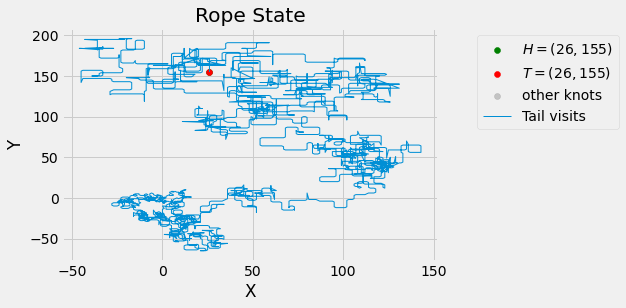

In [46]:
# Part 1
day9(n_knots=2, answer=5960)

Result:  2327


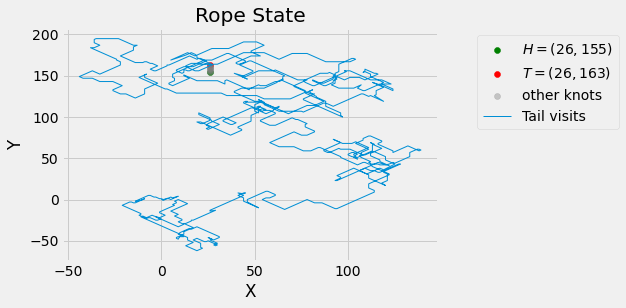

In [47]:
# Part 2
day9(n_knots=10, answer=2327)